In [78]:
%%html
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-162045285-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162045285-1');
</script>


# Covid-19 Analysis

## Presentazione del Report
Analisi della situazione italiana del Covid-19 basata sui dati della Protezione Civile. I dati sono aggiornati alle 18.30 e sono recuperati dal repository https://github.com/pcm-dpc/COVID-19. Per aggiornare i dati rilanciare il presente Notebook.

> Questo Report è stato sviluppando usando Jupyter Lab un tool che permette la scrittura di codice Python tramite Browser. 
Il codice sorgente è disponibile all'indirizzo https://github.com/pasalino/Covid-19-PyAnalysis .

> **Sono gradite le Star (stelline in alto a destra della pagina).** <br/>
> Sono graditi commenti e suggerimenti che potete inviare all'indirizzo pasalino@gmail.com oppure sulla pagina https://github.com/pasalino/Covid-19-PyAnalysis/issues .<br/>
> Qui tutte le nuove funzionalità e la Roadmap del report https://pasalino.github.io/Covid-19-PyAnalysis



## Disclosure e scarico di responsabilità

Questo report non vuole sostituirsi alle fonti ufficiali, ma ne va a completamento. Non consideratelo una fonte ufficiale ma una lettura dei dati ufficiali da un punto di vista matematico.
Non mi ritengo responsabile della diffusione di questo report se non nei limiti delal condivisione di pensiero atta a comprendere meglio i dati. I dati in questo report, non sono analizzati da esperti di settore e quindi proni ad errori.
Potrebbero esserci errori e inesattezze nel codice che produce i dati. Attraverso la pagina sopra indicata è possibile indicarle.

## Indice

In [79]:
%%html
<div id="toc"></div>

In [80]:
%%javascript
$( document ).ready(function() {
    const l = $("<a href='#Indice' class='link_index'> ^ Torna su</a>");
    l.insertAfter('h2');
    l.insertAfter('h3');
    l.insertAfter('h4');
    console.log( "ready!" );
});

<IPython.core.display.Javascript object>

In [81]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [82]:
import os
import subprocess
import pandas as pd 
import datetime
import matplotlib
import math
import numpy as np
from scipy import stats
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt

In [83]:
PROTEZIONE_CIVILE_REPO = 'git@github.com:pcm-dpc/COVID-19.git'
CURRENT_DIR = os.path.join(os.getcwd())
DATA_DIR = os.path.join(os.getcwd(),'data')
REPO_DIR = os.path.join(os.getcwd(),DATA_DIR,'repo')

In [84]:
COLORS = ['tomato', 'seagreen', 'magenta', 'deepskyblue', 'plum', 'orange', 'royalblue',]
COL_TOTALE_CASI = '#1376f7'
COL_ATTUALMENTE_POSITIVI = '#d30202'
COL_DECEDUTI = '#8D09B3'
COL_DIFF_POSITIVI = '#d11212'
COL_GUARITI = 'deepskyblue'
COL_TOT_RICOVERATI = '#FF352D'
COL_ISOLAMENTO_DOMICILIARE = '#FDCEB5'
COL_TERAPIA_INTENSIVA = "#B34220"
COL_RICOVERATI ='#FF7554'
COL_TAMPONI= '#bce079'

COL_AVG= 'green'

NAME_LABELS= {
    'data':'DATA', 
    'ricoverati_con_sintomi':'RICOVERATI', 
    'terapia_intensiva':'TERAPIA INT.',
    'totale_ospedalizzati':'TOT. RICOV.',
    'isolamento_domiciliare':'ISOLAME. DOM.',
    'totale_attualmente_positivi':'TOT. POSITIVI',
    'nuovi_attualmente_positivi':'DIFF. POSITIVI',
    'totale_nuovi_positivi':'TOT. NUOVI POS.',
    'dimessi_guariti':'GUARITI',
    'deceduti':'DECEDUTI',
    'totale_casi':'CASI TOTALI',
    'tamponi':'TAMPONI'    
}

In [85]:
if not os.path.isdir(REPO_DIR):
    p = subprocess.Popen(['git', 'clone', '--single-branch', '-b', 'master', PROTEZIONE_CIVILE_REPO, REPO_DIR])
    p.wait()
else:
    os.chdir(REPO_DIR)
    p = subprocess.Popen(['git', 'pull'])
    p.wait()
    os.chdir(REPO_DIR)
    os.chdir(CURRENT_DIR)

## Articoli di interesse per capire i numeri

* Articolo de Il Sole 24Ore che da un senso ai numeri indicati dalla protezione civile [QUI](https://www.ilsole24ore.com/art/gli-attualmente-contagiati-e-nuovi-positivi-rebus-ogni-sera-ADGG5tF)
* Articolo del Corriere della Sera che ci da una previsione secondo Einaudi Institute for Economincs and Finance (non di settore ma nemmeno degli sprovveduti [QUI](https://www.corriere.it/economia/lavoro/20_marzo_30/coronavirus-italia-quando-si-azzereranno-contagi-previsioni-regione-regione-ae9099dc-7264-11ea-bc49-338bb9c7b205.shtml). 
* Articolo in cui l'Intelligenza Artificiale prova a stimare la fine dell'epidemia [QUI](https://it-blastingnews-com.cdn.ampproject.org/c/s/it.blastingnews.com/cronaca/2020/03/in-casa-fino-a-meta-giugno-a-lavoro-da-settembre-lintelligenza-artificiale-da-le-nuove-previsioni-003100255.amp.html)

## Legenda

* **CASI TOTALI**: Il numero di casi totali riscontrati rispetto al giorno giorno prima. Include guariti e morti
* **DIFF. POSITIVI**: Il numero di casi che sono la differenza dei totali riscontrati in quel giorno meno i guariti e i morti (vedi l'articolo de Il Sole 24ore per capire)
* **ATTUALMENTE POSITIVI**: Il numero dei casi che sono attualmente contagiati

## Ultimo aggiornamento dei dati dalla protezione civile
Questa data è l'ultimo aggiornamento ai dati della protezione civile a cui si riferisce questo Report

In [86]:
os.chdir(REPO_DIR)
p = subprocess.Popen(['git', 'log', '-1', '--format=%cd'], stdout=subprocess.PIPE)
p.wait()
stdout = p.communicate()[0]
out = stdout.decode("utf-8").strip()
display(Markdown(f'**' + out + '**'))
os.chdir(CURRENT_DIR)

**Sat Apr 4 18:07:26 2020 +0200**

In [87]:
plt.rcParams['figure.figsize'] = [20, 7]

In [88]:
def beautify_graph(ax):
    ax.legend(loc="upper left")
    ax.set_xlabel('Date')
    ax.grid(b=True, which='major', color='#888888', linestyle=':')
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#AAAAAA', linestyle=':', alpha=0.5)
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='major', length=14)
    ax.tick_params(axis="x", which='minor', length=0, color='gray')
    ax.tick_params(axis="y", which='minor', length=8, color='gray')
    
def show_table(df, tail=1):
    if 'DATA' in df.columns:
        df = df.drop('DATA',axis=1)
    if 'data' in df.columns:
        df = df.drop('data',axis=1)
    return df.rename(columns = NAME_LABELS).tail(tail)

def interpolation(data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(data)), data)
    x_max= math.floor(-intercept/slope)
    x_int=[0, x_max]
    y_int=[intercept, x_max * slope + intercept]
    
    start_date = datetime.datetime.strptime(data.index[0],'%d-%b-%y')
    x_label = [datetime.datetime.strftime(start_date + datetime.timedelta(days = x),'%d-%b-%y') for x in range(x_max)]
    series = data.tolist() + [0 for x in range(x_max-len(data))]
    
    return x_int, y_int, x_label, series

def xinterpolate(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    x_max= abs(c/m)
    return[1, x_max], [m+c, m*x_max+c]
    #return c,m
    
def xinterpolate_2(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    #x_max= abs(c/m)
    return c,m


## Dati Nazionali

In [89]:
national_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'))
national_trend_read['totale_attualmente_positivi'] = national_trend_read['totale_positivi']
national_trend_read['nuovi_attualmente_positivi'] = national_trend_read['variazione_totale_positivi']
national_trend = pd.DataFrame()
national_trend['DATA'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')
national_trend['data'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')

national_columns = ['totale_casi','totale_attualmente_positivi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'tamponi']
for n in national_columns:
    national_trend[n] = national_trend_read[n]

national_trend.set_index(keys=['DATA'], append=False, inplace=True)
national_trend.index.rename('', inplace=True)

### I dati di oggi

In [90]:
incremental_data = pd.DataFrame()
incremental_columns = ['data','totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = national_trend[c]
    else:
        incremental_data[c] = national_trend[c] - national_trend[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

In [91]:
show_table(incremental_data)

,CASI TOTALI,DIFF. POSITIVI,GUARITI,DECEDUTI,TOT. RICOV.,RICOVERATI,TERAPIA INT.,ISOLAME. DOM.,TOT. POSITIVI,TAMPONI
,,,,,,,,,,
04-Apr-20,4805,2886,1238,681,195,269,-74,2691,2886,37375


### I dati cumulati di oggi

In [92]:
show_table(national_trend).drop('DIFF. POSITIVI', axis=1)

,CASI TOTALI,TOT. POSITIVI,GUARITI,DECEDUTI,TOT. RICOV.,RICOVERATI,TERAPIA INT.,ISOLAME. DOM.,TAMPONI
,,,,,,,,,
04-Apr-20,124632,88274,20996,15362,33004,29010,3994,55270,657224


#### Grafico della progressione giornaliera
Ogni punto indica il numero di casi evidenziati in quel giorno

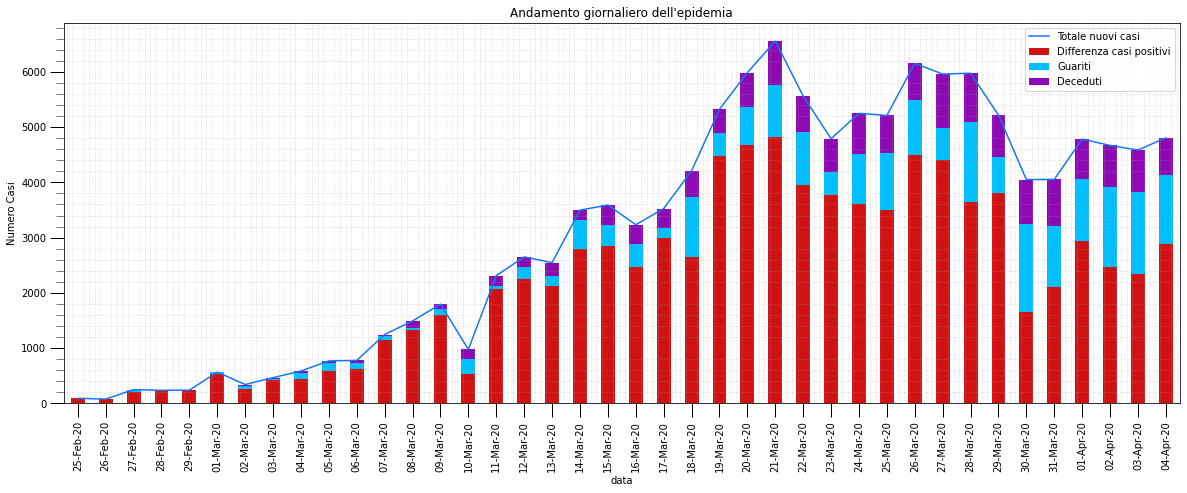

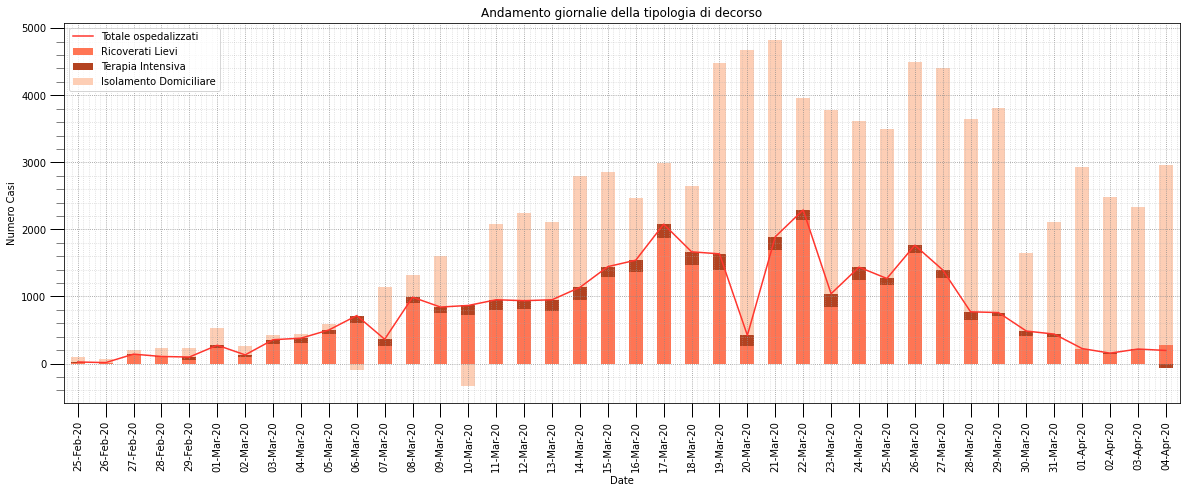

In [93]:
plot =['totale_casi']
legends = ["Totale nuovi casi"]
colors = [COL_TOTALE_CASI]
ax = incremental_data.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)

plot =['nuovi_attualmente_positivi','dimessi_guariti','deceduti']
legends = ["Differenza casi positivi","Guariti","Deceduti"]
colors = [COL_DIFF_POSITIVI, COL_GUARITI, COL_DECEDUTI]
ay = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=legends, stacked=True, ax=ax)

legends = ["Totale ospedalizzati"]
colors = [COL_TOT_RICOVERATI]
aw = incremental_data.plot(kind='line', x='data', y=['totale_ospedalizzati'], color=[COL_TOT_RICOVERATI], rot=90, label=legends)

plot =['ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare',]
legends = ["Ricoverati Lievi","Terapia Intensiva","Isolamento Domiciliare"]
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
az = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, stacked=True, label=legends, ax=aw)
aw.set_title("Andamento giornalie della tipologia di decorso")
aw.set_ylabel('Numero Casi')
beautify_graph(aw)



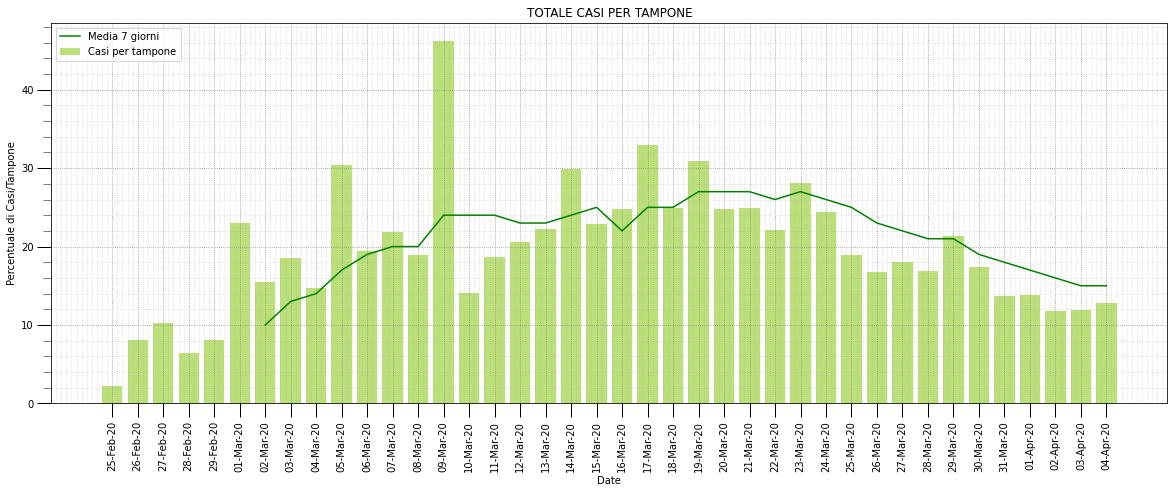

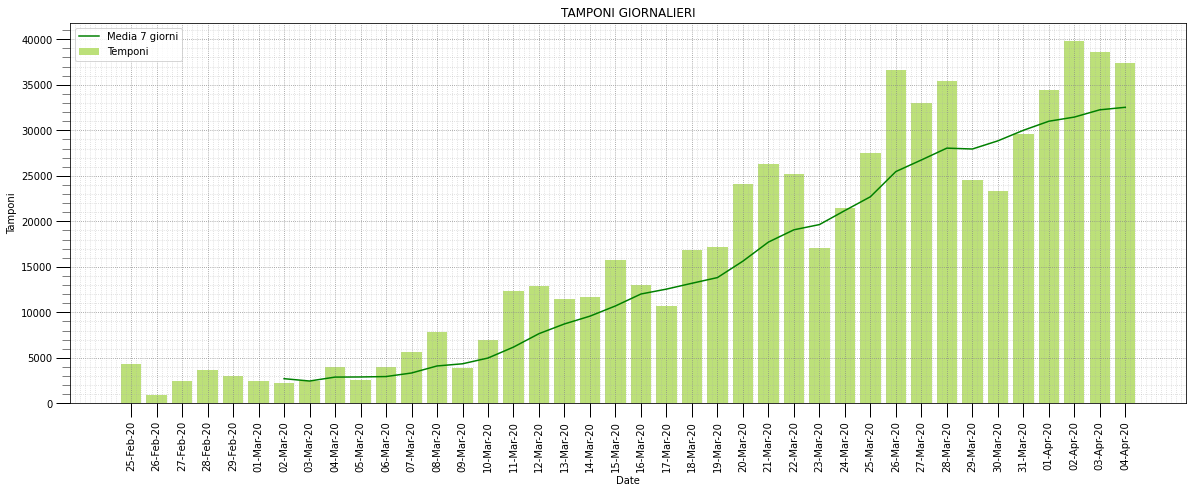

In [94]:
fig, ax = plt.subplots()

casi_tampone = incremental_data['totale_casi']/incremental_data['tamponi']

media_7_giorni =casi_tampone.rolling(7).mean().round(2)


plt.plot(incremental_data['data'], media_7_giorni*100, color=COL_AVG, label='Media 7 giorni')

ax.bar(incremental_data['data'], (incremental_data['totale_casi']/incremental_data['tamponi'])*100, label='Casi per tampone', color=COL_TAMPONI)

ax.set_xticklabels(incremental_data['data'], rotation=90)
ax.set_title("TOTALE CASI PER TAMPONE")
ax.set_ylabel('Percentuale di Casi/Tampone')
beautify_graph(ax)

fig, ax = plt.subplots()
tamponi = incremental_data['tamponi']

media_7_giorni =tamponi.rolling(7).mean().round(2)

plt.plot(incremental_data['data'], media_7_giorni, color=COL_AVG, label='Media 7 giorni')

ax.bar(incremental_data['data'], tamponi, label='Temponi', color=COL_TAMPONI)

ax.set_xticklabels(incremental_data['data'], rotation=90)
ax.set_title("TAMPONI GIORNALIERI")
ax.set_ylabel('Tamponi')
beautify_graph(ax)

#### I dati degli ultimi 5 giorni

In [95]:
show_table(incremental_data.rename(columns=NAME_LABELS),5).drop('TOT. POSITIVI', axis=1)

,CASI TOTALI,DIFF. POSITIVI,GUARITI,DECEDUTI,TOT. RICOV.,RICOVERATI,TERAPIA INT.,ISOLAME. DOM.,TAMPONI
,,,,,,,,,
31-Mar-20,4053,2107,1109,837,439,397,42,1668,29609
01-Apr-20,4782,2937,1118,727,223,211,12,2714,34455
02-Apr-20,4668,2477,1431,760,155,137,18,2322,39809
03-Apr-20,4585,2339,1480,766,216,201,15,2123,38617
04-Apr-20,4805,2886,1238,681,195,269,-74,2691,37375


### Andamento Nazionale
I dati cumulati nei giorni. Ci da idea di come sta evolvendo l'epidemia.

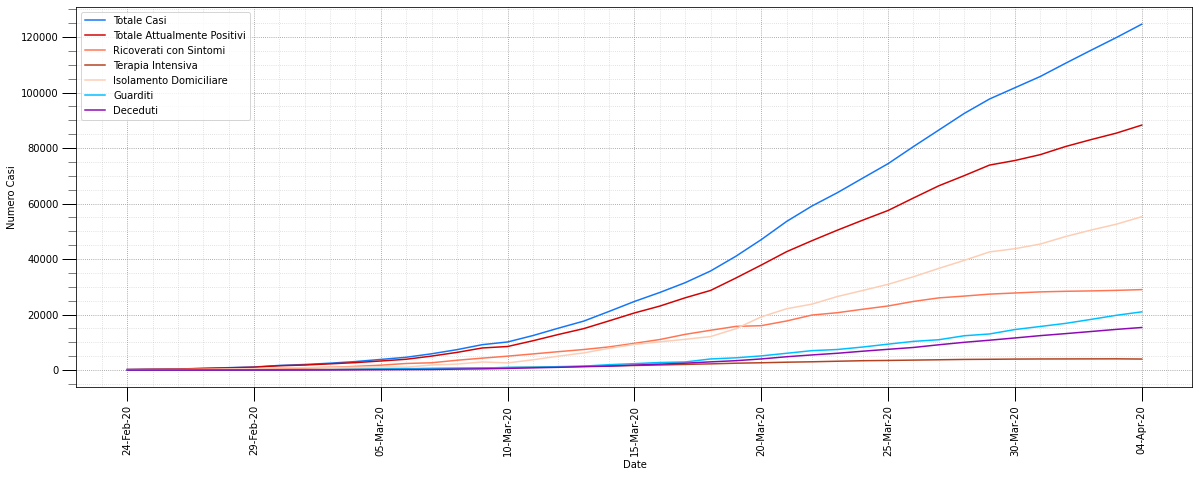

In [96]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
ax = national_trend.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
beautify_graph(ax)

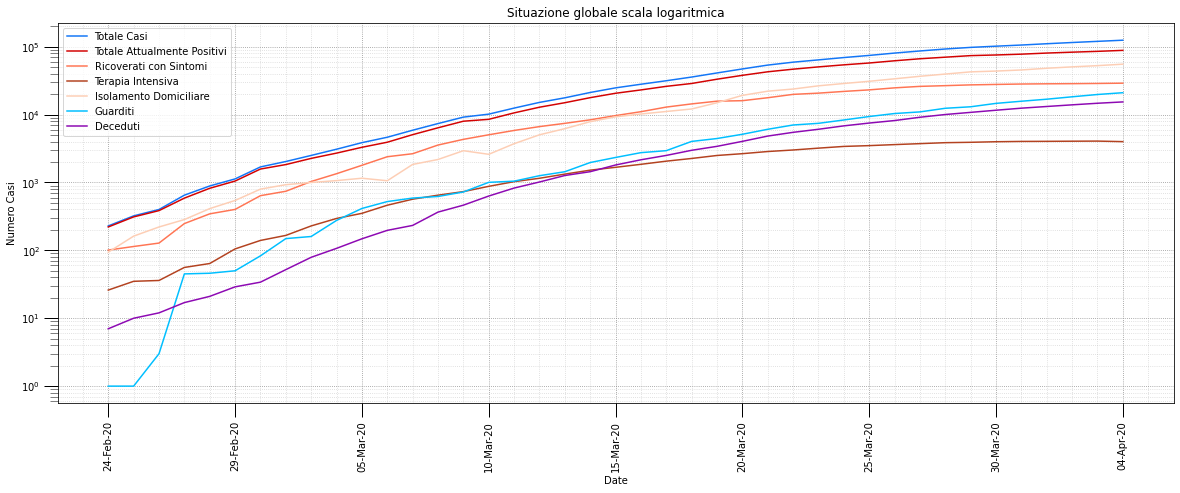

In [97]:

fig, ax = plt.subplots()
plt.yscale('log')
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
ay = national_trend.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends, ax=ax)
ay.set_ylabel('Numero Casi')
ay.set_title("Situazione globale scala logaritmica")
beautify_graph(ay)

#### I dati degli ultimi 5 giorni

In [98]:
show_table(national_trend.rename(columns = NAME_LABELS),5).drop('DIFF. POSITIVI', axis=1)

,CASI TOTALI,TOT. POSITIVI,GUARITI,DECEDUTI,TOT. RICOV.,RICOVERATI,TERAPIA INT.,ISOLAME. DOM.,TAMPONI
,,,,,,,,,
31-Mar-20,105792,77635,15729,12428,32215,28192,4023,45420,506968
01-Apr-20,110574,80572,16847,13155,32438,28403,4035,48134,541423
02-Apr-20,115242,83049,18278,13915,32593,28540,4053,50456,581232
03-Apr-20,119827,85388,19758,14681,32809,28741,4068,52579,619849
04-Apr-20,124632,88274,20996,15362,33004,29010,3994,55270,657224


### Percentuale di crescita
Le percentuali di crescita sono valori che danno idea rispetto al giorno precedente di come si muove l'epidemia.
Questi valori a causa del numero molto elevato di contagi è normale che scendano.

In [99]:
growth_rates = pd.DataFrame()
growth_rates['data'] = pd.to_datetime(national_trend['data']).dt.date
growth_rates_columns = ['totale_casi','nuovi_attualmente_positivi', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare',  'tamponi']

for c in growth_rates_columns:
    growth_rates[c] = (national_trend[c] - national_trend[c].shift(1))/national_trend[c].shift(1)*100
growth_rates= growth_rates.round(2)
growth_rates=growth_rates[1:]

In [100]:
show_table(growth_rates.rename(columns=NAME_LABELS),1)

,CASI TOTALI,DIFF. POSITIVI,TOT. POSITIVI,GUARITI,DECEDUTI,TOT. RICOV.,RICOVERATI,TERAPIA INT.,ISOLAME. DOM.,TAMPONI
,,,,,,,,,,
04-Apr-20,4.01,23.39,3.38,6.27,4.64,0.59,0.94,-1.82,5.12,6.03


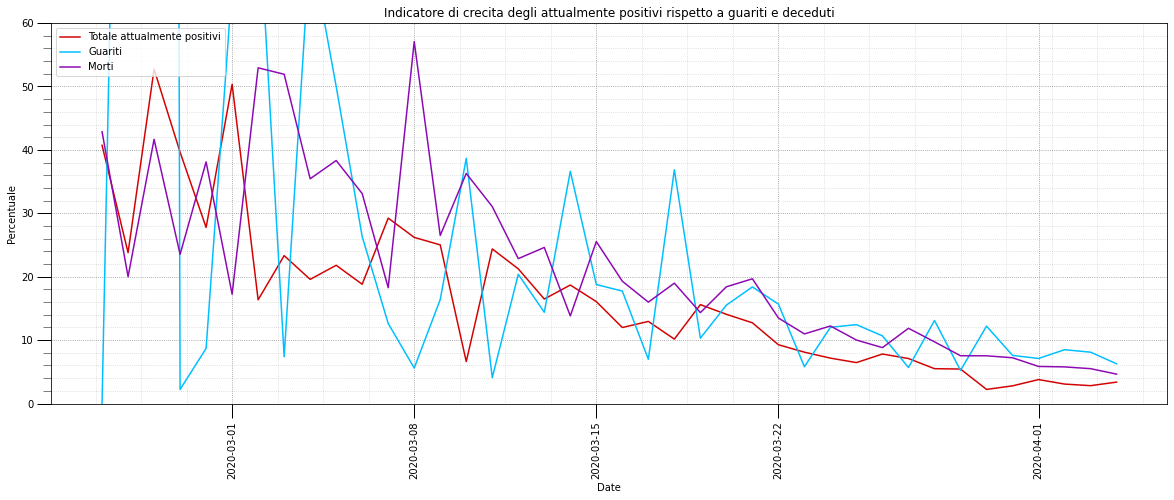

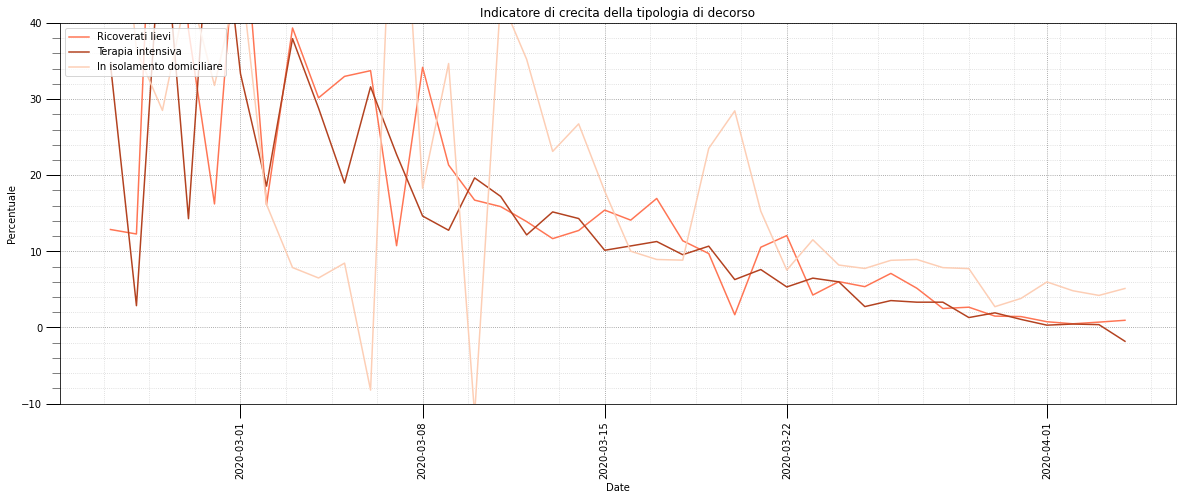

In [101]:
fig, ax = plt.subplots()

plot =['totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', ]
labels = ['Totale attualmente positivi', 'Guariti', 'Morti', ]
colors = [COL_ATTUALMENTE_POSITIVI, COL_GUARITI, COL_DECEDUTI]
ay = growth_rates.plot(kind='line', x='data', y=plot, color=colors, label=labels, rot=90, ax=ax)
ax.set_ylabel('Percentuale')
ax.set_title("Indicatore di crecita degli attualmente positivi rispetto a guariti e deceduti")
beautify_graph(ax)
ax.set_ylim(0,60)
fig, ax = plt.subplots()

plot =['ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare']
labels = ['Ricoverati lievi', 'Terapia intensiva', 'In isolamento domiciliare']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
ay = growth_rates.plot(kind='line', x='data', y=plot, color=colors,label=labels, rot=90, ax=ax)
ay.set_ylabel('Percentuale')
ay.set_title("Indicatore di crecita della tipologia di decorso")
ay.set_ylim(-10,40)
beautify_graph(ay)



#### I dati degli ultimi 5 giorni
I valori sono in percentuale (%)

In [102]:
show_table(growth_rates.rename(columns=NAME_LABELS),5)

,CASI TOTALI,DIFF. POSITIVI,TOT. POSITIVI,GUARITI,DECEDUTI,TOT. RICOV.,RICOVERATI,TERAPIA INT.,ISOLAME. DOM.,TAMPONI
,,,,,,,,,,
31-Mar-20,3.98,27.85,2.79,7.59,7.22,1.38,1.43,1.06,3.81,6.20
01-Apr-20,4.52,39.39,3.78,7.11,5.85,0.69,0.75,0.30,5.98,6.80
02-Apr-20,4.22,-15.66,3.07,8.49,5.78,0.48,0.48,0.45,4.82,7.35
03-Apr-20,3.98,-5.57,2.82,8.10,5.50,0.66,0.70,0.37,4.21,6.64
04-Apr-20,4.01,23.39,3.38,6.27,4.64,0.59,0.94,-1.82,5.12,6.03


### Trends e medie
Uno spaccato di alcuni dati.
Viene visualizzato anche il trend medio settimanale.
GR = Growth Rate - Fattore di crescita

In [103]:
avg_trend = pd.DataFrame()
avg_trend['data'] = national_trend['data']

avg_trend['totale_casi'] = national_trend['totale_casi']
avg_trend['totale_casi_percent'] = growth_rates['totale_casi']
avg_trend['avg_totale'] = growth_rates['totale_casi'].rolling(7).mean().round(2)

avg_trend['attualmente_positivi'] = national_trend['totale_attualmente_positivi']
avg_trend['attualmente_positivi_percent'] = (avg_trend['attualmente_positivi'] - avg_trend['attualmente_positivi'].shift(1))/avg_trend['attualmente_positivi'].shift(1)*100
avg_trend['attualmente_positivi_percent']= avg_trend['attualmente_positivi_percent'].round(2)
avg_trend['avg_att_positivi'] = avg_trend['attualmente_positivi_percent'].rolling(7).mean().round(2)

avg_trend['dimessi_guariti'] = national_trend['dimessi_guariti']
avg_trend['dimessi_guariti_percent'] = growth_rates['dimessi_guariti']
avg_trend['avg_dimessi_guariti'] = growth_rates['dimessi_guariti'].rolling(7).mean().round(2)

avg_trend['deceduti'] = incremental_data['deceduti']
avg_trend['deceduti_percent'] = growth_rates['deceduti']
avg_trend['avg_deceduti'] = growth_rates['deceduti'].rolling(7).mean().round(2)

avg_trend['tamponi'] = incremental_data['tamponi']
avg_trend['tamponi_percent'] = growth_rates['tamponi']
avg_trend['avg_tamponi'] = growth_rates['tamponi'].rolling(7).mean().round(2)

* **CASI TOTALI GR**: Quando questo numero sarà zero, l'epidemia si sarà fermata e dovremmo aspettare che tutti siano guariti (Sperando che nessuno infetti altri).
* **NUOVI CASI TOTALI GR**: Quando questo numero sarà zero, non ci saranno più nuovi contagi e dovremo solo aspettare che tutti guardiscano
* **TAMPONI GR**: Più è alto questo numero più sono i tamponi che stanno effettuando rispetto al giorno prima. Non può andare in negativo. Se è 0 significa che non hanno fatto tamponi rispetto al giorno prima
* **DECEDUTI**: Questo numero indica di quanto aumentano rispetto al giorno prima i morti. Se questo numero va a zero significa che non ci sono più nuovi morti.

In [104]:
LABELS = {
    'nuovi_attualmente_positivi_casi': 'NUOVI CASI', 'nuovi_attualmente_positivi_percent': 'GR(%)', 'avg_nuovi': 'MEDIA 7GG (%)',
    'attualmente_positivi': 'TOT. ATTUALMENT. POS.',
    'attualmente_positivi_percent': 'GR(%)', 'avg_att_positivi': 'MEDIA 7GG (%)',
    'tamponi_percent': 'GR(%)', 'avg_tamponi': 'MEDIA 7GG (%)',
    'deceduti_percent': 'GR(%)', 'avg_deceduti':'MEDIA 7GG (%)',
    'totale_casi_percent': 'GR(%)', 'avg_totale':'MEDIA 7GG (%)',
    'dimessi_guariti_percent':'GR(%)', 'avg_dimessi_guariti':'MEDIA 7GG (%)',
}
show_table(avg_trend,5).rename(columns=LABELS)

,CASI TOTALI,GR(%),MEDIA 7GG (%),TOT. ATTUALMENT. POS.,GR(%),MEDIA 7GG (%),GUARITI,GR(%),MEDIA 7GG (%),DECEDUTI,GR(%),MEDIA 7GG (%),TAMPONI,GR(%),MEDIA 7GG (%)
,,,,,,,,,,,,,,,
31-Mar-20,105792,3.98,6.27,77635,2.79,5.33,15729,7.59,9.56,837,7.22,8.96,29609,6.20,7.96
01-Apr-20,110574,4.52,5.84,80572,3.78,4.95,16847,7.11,8.80,727,5.85,8.37,34455,6.80,7.61
02-Apr-20,115242,4.22,5.26,83049,3.07,4.27,18278,8.49,8.48,760,5.78,7.93,39809,7.35,7.05
03-Apr-20,119827,3.98,4.77,85388,2.82,3.66,19758,8.10,8.83,766,5.50,7.02,38617,6.64,6.69
04-Apr-20,124632,4.01,4.36,88274,3.38,3.36,20996,6.27,7.85,681,4.64,6.29,37375,6.03,6.27


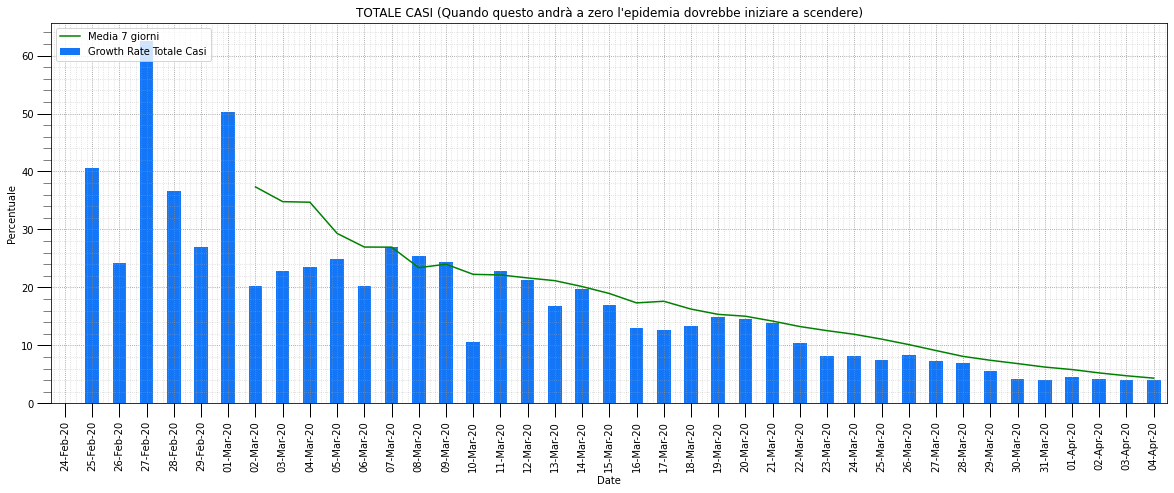

In [105]:
fig, ax = plt.subplots()
ay = avg_trend.plot(kind='line', x='data', y=['avg_totale'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind='bar', x='data', y=['totale_casi_percent'], color=[COL_TOTALE_CASI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("TOTALE CASI (Quando questo andrà a zero l'epidemia dovrebbe iniziare a scendere)")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

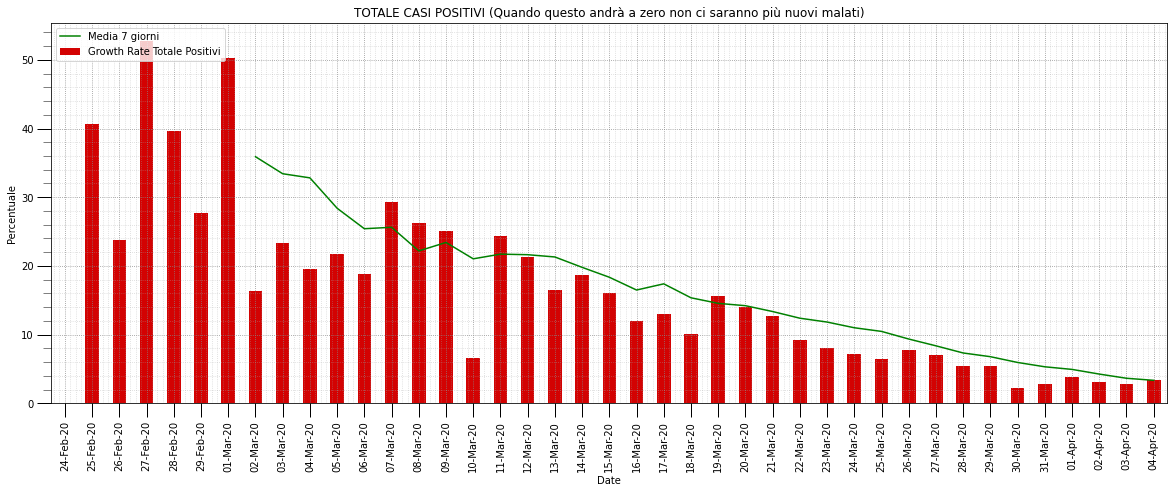

In [106]:
fig, ax = plt.subplots()

#ax.bar(x, series+fill, color=[COL_ATTUALMENTE_POSITIVI], label='Growth Rate Totale Positivi')
ay = avg_trend.plot(kind='line', x='data', y=['avg_att_positivi'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind="bar", x='data', y=['attualmente_positivi_percent'], color=[COL_ATTUALMENTE_POSITIVI], label=['Growth Rate Totale Positivi'], ax=ay)

ax.set_title("TOTALE CASI POSITIVI (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Percentuale')

beautify_graph(ax)


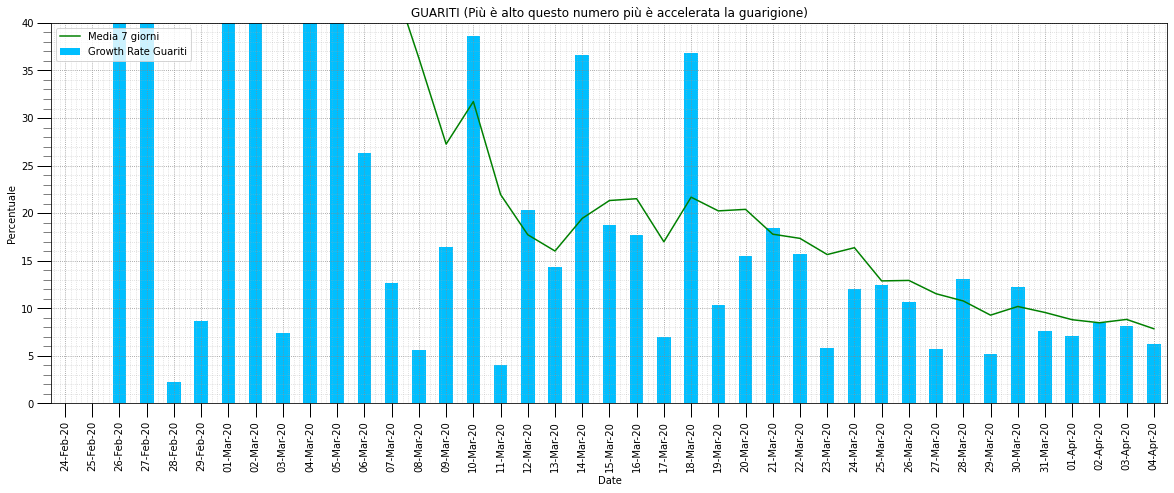

In [107]:
fig, ax = plt.subplots()
plot = ['dimessi_guariti_percent']

labels = ['Growth Rate Guariti']
ay = avg_trend.plot(kind='bar', x='data', y=plot, color=[COL_GUARITI], rot=90, label=labels, ax=ax)

plot = ['avg_dimessi_guariti']
labels = ['Media 7 giorni']
ay = avg_trend.plot(kind='line', x='data', y=plot, color=[COL_AVG], rot=90, label=labels, ax=ax)

ax.set_title("GUARITI (Più è alto questo numero più è accelerata la guarigione)")
ax.set_ylabel('Percentuale')
ax.set_ylim(0,40)
beautify_graph(ax)

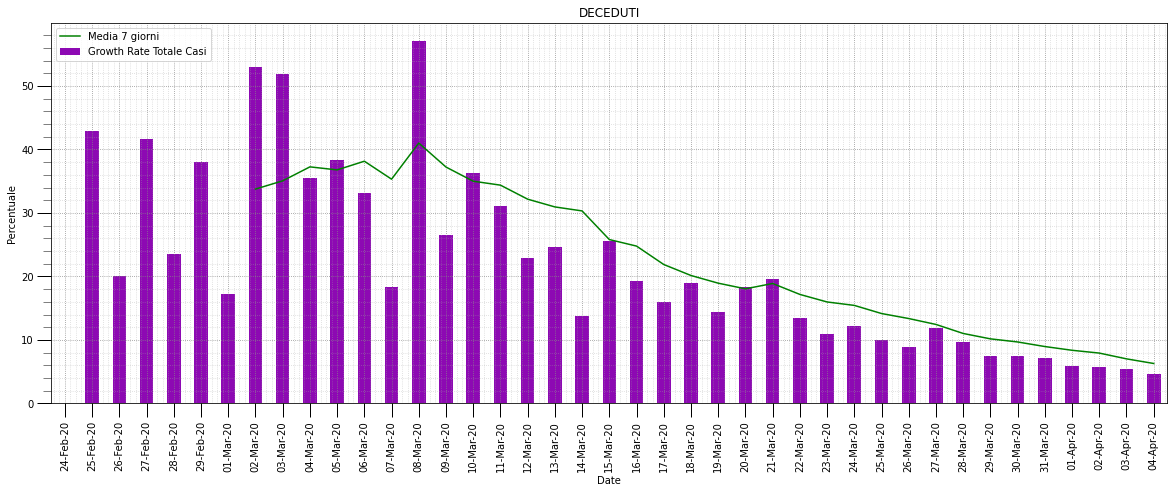

In [108]:
fig, ax = plt.subplots()

ay = avg_trend.plot(kind='line', x='data', y=['avg_deceduti'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
avg_trend.plot(kind='bar', x='data', y=['deceduti_percent'], color=[COL_DECEDUTI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("DECEDUTI")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

## Velocità epidemia (Growth Factor)

Calcolo della derivata. La derivata ci dà l'idea della velocità e della direzione della curva epidemica. Se il valore è uguale a 0 la crescita è lineare (ogni giorno cresce dello stesso numero di persone è come andare a una velocità fissa di 50KM orari). Un fattore maggiore di uno zero indica che la crescita aumenta la sua velocità (l'epidemia schiaccia sull'acceleratore), un valore inferiore a zero indica l'epidemia rallenta la sua velocità (l'epidemaia ha schiacciato il freno).

In [109]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['totale_casi'] = national_trend['totale_casi']
gf['diff'] = gf['totale_casi'] - gf['totale_casi'].shift(1)
gf['gr'] = ((gf['diff'] / gf['diff'].shift(1))-1).round(3)
gf['avg_gf_3'] = gf['gr'].rolling(3).mean().round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)

gf['totale_attualmente_positivi'] = national_trend['totale_attualmente_positivi']
gf['diff_att_pos'] = gf['totale_attualmente_positivi'] - gf['totale_attualmente_positivi'].shift(1)
gf['gr_att_pos'] = ((gf['diff_att_pos'] / gf['diff_att_pos'].shift(1))-1).round(3)
gf['avg_att_pos_3'] = gf['gr'].rolling(3).mean().round(3)
gf['avg_att_pos'] = gf['gr_att_pos'].rolling(7).mean().round(3)


show_table(gf, 5)\
    .drop('diff', axis=1)\
    .drop('diff_att_pos', axis=1)\
    .rename(columns=
       {'gr': 'GROWTH FACTOR', 
        'avg_gf': 'MEDIA 7GG',
        'avg_gf_3': 'MEDIA 3GG',
        'gr_att_pos': 'GROWTH FACTOR ATT. POS.',
        'avg_att_pos_3': 'MEDIA 3GG',
        'avg_att_pos': 'MEDIA 7GG',
        'gr_tamponi': 'GROWTH FACTOR TAMPONI',
        'avg_tamponi_3': 'MEDIA 3GG',
        'avg_tamponi': 'MEDIA 7GG'
       })


,CASI TOTALI,GROWTH FACTOR,MEDIA 3GG,MEDIA 7GG,TOT. POSITIVI,GROWTH FACTOR ATT. POS.,MEDIA 3GG,MEDIA 7GG
,,,,,,,,
31-Mar-20,105792,0.001,-0.117,-0.029,77635,0.279,-0.117,-0.026
01-Apr-20,110574,0.180,-0.014,-0.003,80572,0.394,-0.014,0.035
02-Apr-20,115242,-0.024,0.052,-0.032,83049,-0.157,0.052,-0.028
03-Apr-20,119827,-0.018,0.046,-0.030,85388,-0.056,0.046,-0.033
04-Apr-20,124632,0.048,0.002,-0.023,88274,0.234,0.002,0.024


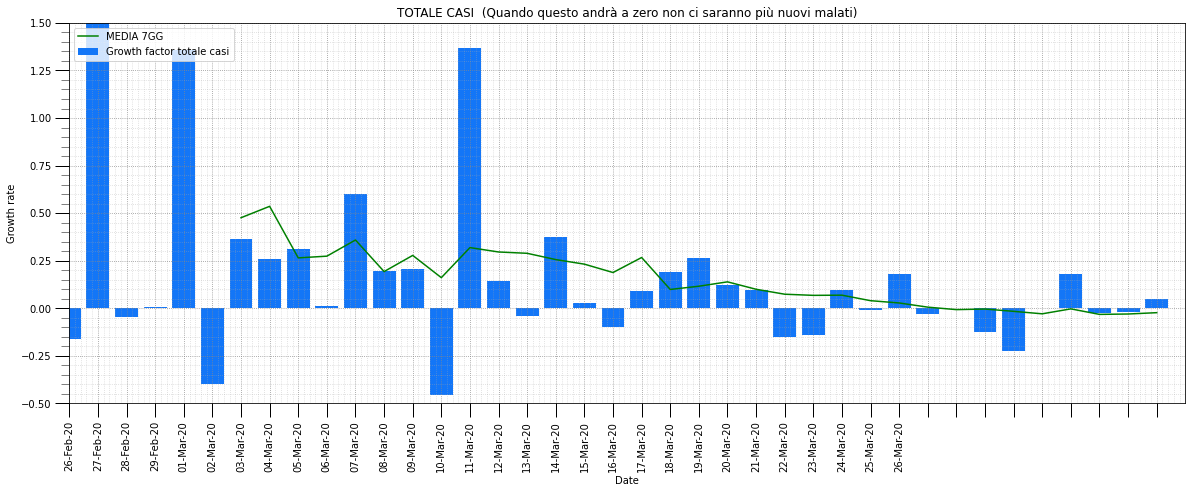

In [114]:
data_y = gf[2:]['gr']

x_int, y_int, x_label, series = interpolation(data_y)

l=len(data_y)-7
x_int2, y_int2, _, _ = interpolation(data_y[l:])
x_int2[0]+=l
x_int2[1]+=l


l=len(data_y)-3
x_int3, y_int3, _, _ = interpolation(data_y[l:])
x_int3[0]+=l
x_int3[1]+=l

tot_len = len(gf[2:]['gr'])

l=7
y_l7 = gf[-l:]['gr'].tolist()
x_l7 = np.arange(tot_len-l, tot_len)

mymodel_l7 = np.poly1d(np.polyfit(x_l7, y_l7, 3))
myline_l7 = np.linspace(1, 100, 100)

y = gf[2:]['gr'].tolist()
x = np.arange(0, len(y))

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 100, 100)


fig, ax = plt.subplots()

ax.bar(gf[2:]['data'], data_y, label='Growth factor totale casi', color=COL_TOTALE_CASI)
ay = gf[2:].plot(kind='line', x='data', y=['avg_gf'], color=[COL_AVG], rot=90, label=['MEDIA 7GG'], ax=ax)

#plt.plot(x_int, y_int, color='tomato', label='Interpolazione lineare')
#plt.plot(x_int2, y_int2, color='grey', label='Interpolazione lineare ultimi 7 giorni')
#plt.plot(x_int3, y_int3, color='blue', label='Interpolazione lineare ultimi 3 giorni')
ax.set_xlim(0,len(series))
ax.set_xticklabels(x_label, rotation=90)

ax.set_ylim(-0.5,1.5)
ax.set_title("TOTALE CASI  (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)

#fig, ax = plt.subplots()

#ax.bar(gf[2:]['data'], data_y, label='Growth factor totale casi', color=COL_TOTALE_CASI)
#ay = gf[2:].plot(kind='line', x='data', y=['avg_gf'], color=[COL_AVG], rot=90, label=['MEDIA 7GG'], ax=ax)
#plt.plot(myline, mymodel(myline), color='gold', label='Interpolazione polinomiale')
#plt.plot(myline_l7, mymodel_l7(myline_l7), color='darkgreen', label='Interpolazione polinomiale 7 giorni')
#ax.set_xlim(0,len(series))
#ax.set_xticklabels(x_label, rotation=90)

#ax.set_ylim(0,2)
#ax.set_title("TOTALE CASI  (Quando questo andrà a zero non ci saranno più nuovi malati)")
#ax.set_ylabel('Growth rate')
#beautify_graph(ax)

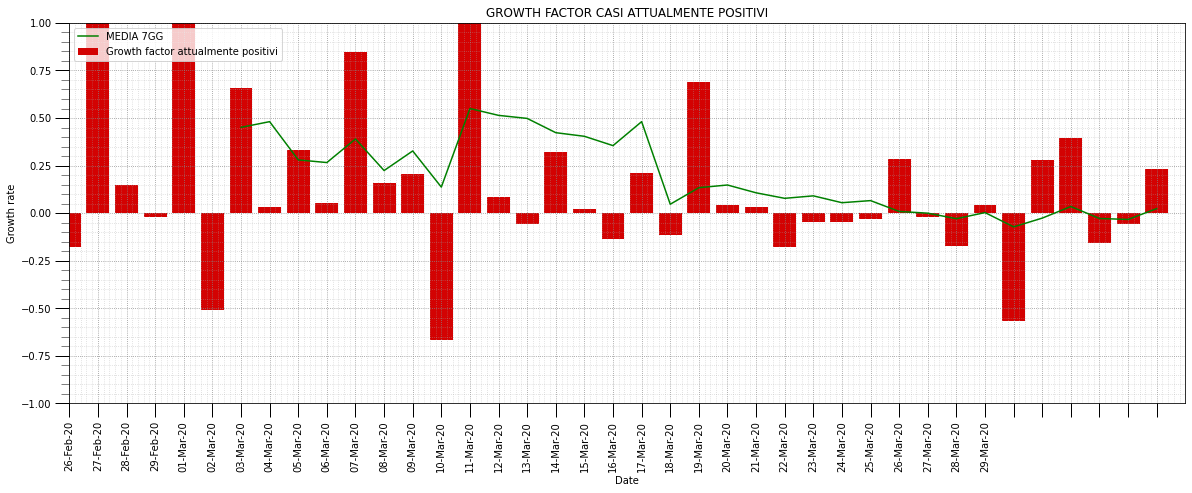

In [119]:
data_y = gf[2:]['gr_att_pos']

x_int, y_int, x_label, series = interpolation(data_y)

l=len(data_y)-7
x_int2, y_int2, _, _ = interpolation(data_y[l:])
x_int2[0]+=l
x_int2[1]+=l
#print(x_int2, y_int2, _, _ )

l=len(data_y)-3
x_int3, y_int3, _, _ = interpolation(data_y[l:])
x_int3[0]+=l
x_int3[1]+=l
#print(x_int3, y_int3, _, _ )


l=7
y_l7 = gf[-l:]['gr_att_pos'].tolist()
x_l7 = np.arange(tot_len-l, tot_len)

mymodel_l7 = np.poly1d(np.polyfit(x_l7, y_l7, 3))
myline_l7 = np.linspace(1, 100, 100)

y = gf[2:]['gr_att_pos'].tolist()
x = np.arange(0, len(y))

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 100, 100)



y_avg = gf[8:]['avg_att_pos'].tolist()
le= len(gf[8:]['avg_att_pos'].tolist())
x_avg = np.arange(8, le+8)
mymodel_avg = np.poly1d(np.polyfit(x_avg, y_avg, 3))
myline_avg = np.linspace(1, 100, 100)



fig, ax = plt.subplots()

ax.bar(gf[2:]['data'], data_y, label='Growth factor attualmente positivi', color=COL_ATTUALMENTE_POSITIVI)
ay = gf[2:].plot(kind='line', x='data', y=['avg_att_pos'], color=[COL_AVG], rot=90, label=['MEDIA 7GG'], ax=ax)

#plt.plot(x_int, y_int, color='tomato', label='Interpolazione')
#plt.plot(x_int2, y_int2, color='grey', label='Interpolazione ultimi 7 giorni')
#plt.plot(x_int3, y_int3, color='blue', label='Interpolazione ultimi 3 giorni')
ax.set_xlim(0,len(series))
ax.set_xticklabels(x_label, rotation=90)

ax.set_ylim(-1,1)
ax.set_title("GROWTH FACTOR CASI ATTUALMENTE POSITIVI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


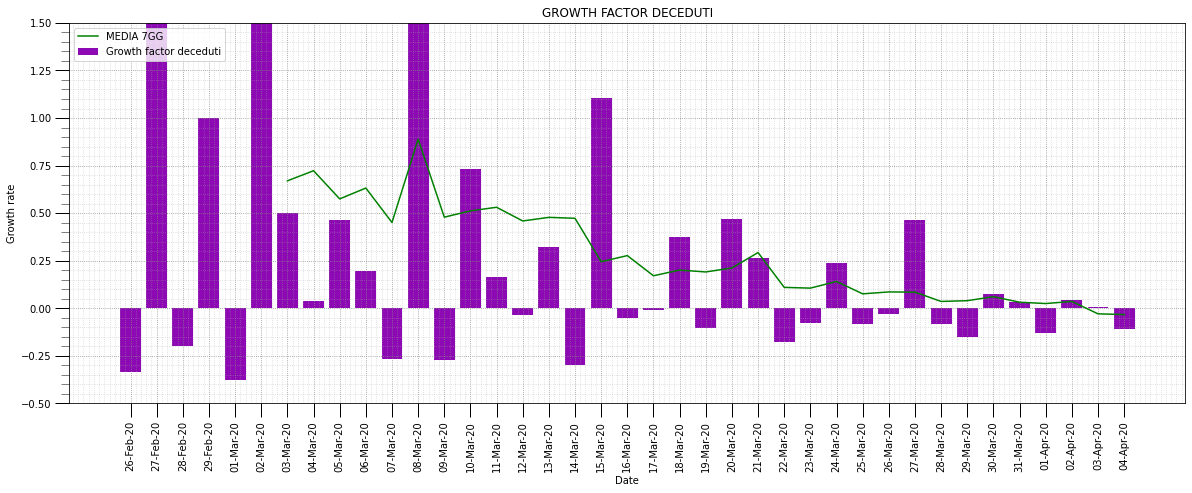

In [122]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['deceduti'] = national_trend['deceduti']
gf['diff'] = gf['deceduti'] - gf['deceduti'].shift(1)
gf['gr'] = (gf['diff'] / gf['diff'].shift(1) -1).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)


fig, ax = plt.subplots()

ax.bar(gf['data'][2:], gf['gr'][2:], label='Growth factor deceduti', color=COL_DECEDUTI)
ay = gf[2:].plot(kind='line', x='data', y=['avg_gf'], color=[COL_AVG], rot=90, label=['MEDIA 7GG'], ax=ax)

ax.set_ylim(-0.5,1.5)
ax.set_title("GROWTH FACTOR DECEDUTI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)

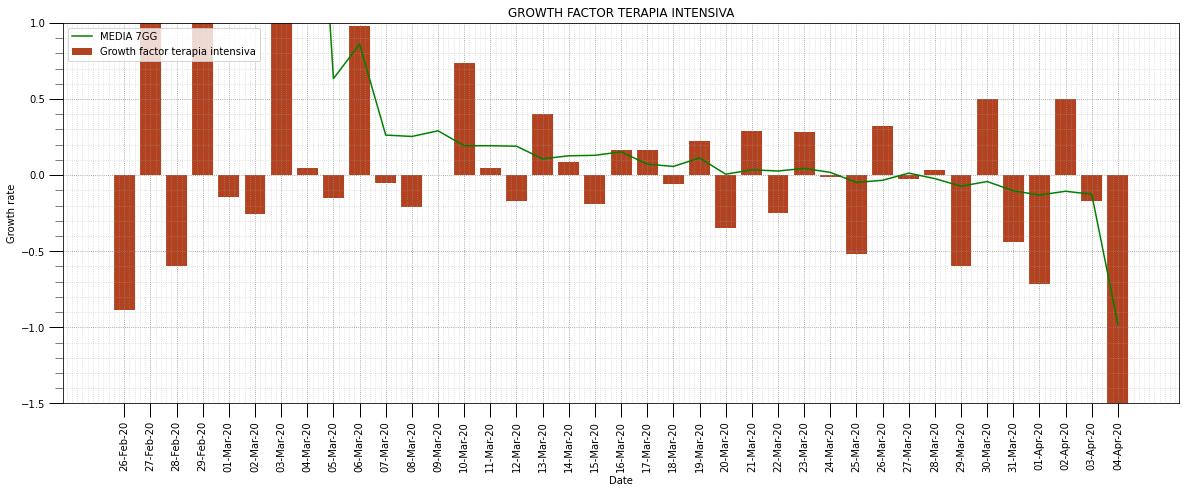

In [135]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['terapia_intensiva'] = national_trend['terapia_intensiva']
gf['diff'] = gf['terapia_intensiva'] - gf['terapia_intensiva'].shift(1)
gf['gr'] = (gf['diff'] / gf['diff'].shift(1)-1).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)


fig, ax = plt.subplots()

ax.bar(gf['data'][2:], gf['gr'][2:], label='Growth factor terapia intensiva', color=COL_TERAPIA_INTENSIVA)
ay = gf[2:].plot(kind='line', x='data', y=['avg_gf'], color=[COL_AVG], rot=90, label=['MEDIA 7GG'], ax=ax)

ax.set_ylim(-1.5,1)
ax.set_title("GROWTH FACTOR TERAPIA INTENSIVA")
ax.set_ylabel('Growth rate')
beautify_graph(ax)

### Divisione percentuali dei casi
Un indicazione percentuale dei dati. La fotografia ad oggi (dall'inizio dell'epidemia italiana)

**Le percentuali giornaliere (dati giorno per giorno)**

In [150]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = incremental_data['data']
percents_in_period['ricoverati_con_sintomi'] = (incremental_data['ricoverati_con_sintomi'] / incremental_data['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (incremental_data['terapia_intensiva'] / incremental_data['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (incremental_data['isolamento_domiciliare'] / incremental_data['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (incremental_data['dimessi_guariti'] / incremental_data['totale_casi'])*100
percents_in_period['deceduti'] = (incremental_data['deceduti'] / incremental_data['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

In [161]:
percents_in_period.tail(15).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

,RICOVERATI,TER. INTENSIVA,ISOLAMENTO DOMICILIARE,GUARITI,DECEDUTI
,,,,,
21-Mar-20,25.74,3.08,44.70,14.38,12.09
22-Mar-20,38.45,2.73,29.98,17.12,11.71
23-Mar-20,17.67,4.07,57.19,8.52,12.55
24-Mar-20,23.72,3.66,41.44,17.03,14.16
25-Mar-20,22.55,1.79,42.67,19.88,13.11
26-Mar-20,26.67,2.00,44.34,16.24,10.76
27-Mar-20,21.41,2.01,50.43,9.88,16.26
28-Mar-20,10.83,2.08,48.21,24.00,14.88
29-Mar-20,13.61,0.96,58.56,12.38,14.49


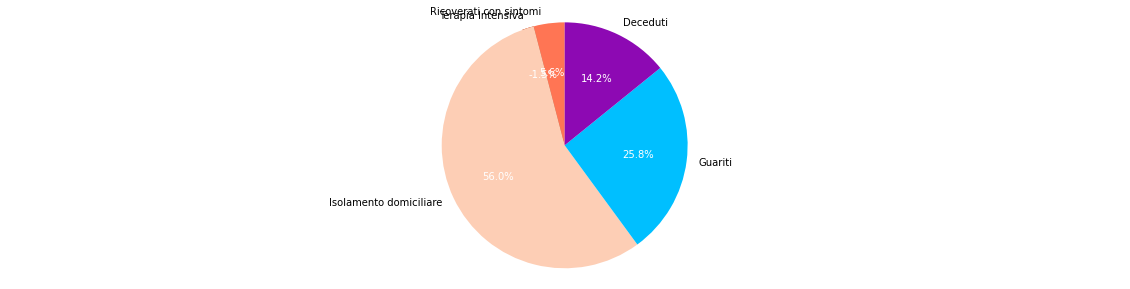

In [152]:
# Data to plot
last_info = incremental_data[-1:]
v1 = int(last_info['ricoverati_con_sintomi'])
v2 = int(last_info['terapia_intensiva'])
v3 = int(last_info['isolamento_domiciliare'])
v4 = int(last_info['dimessi_guariti'])
v5 = int(last_info['deceduti'])
labels = 'Ricoverati con sintomi', 'Terapia Intensiva', 'Isolamento domiciliare', 'Guariti', 'Deceduti'
sizes = [v1, v2, v3, v4, v5]
fig1, ax1 = plt.subplots()
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
_, _, autotexts = ax1.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%',  startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    
ax1.axis('equal')
plt.show()


**Le percentuali dall'inizio dell'epidemia**

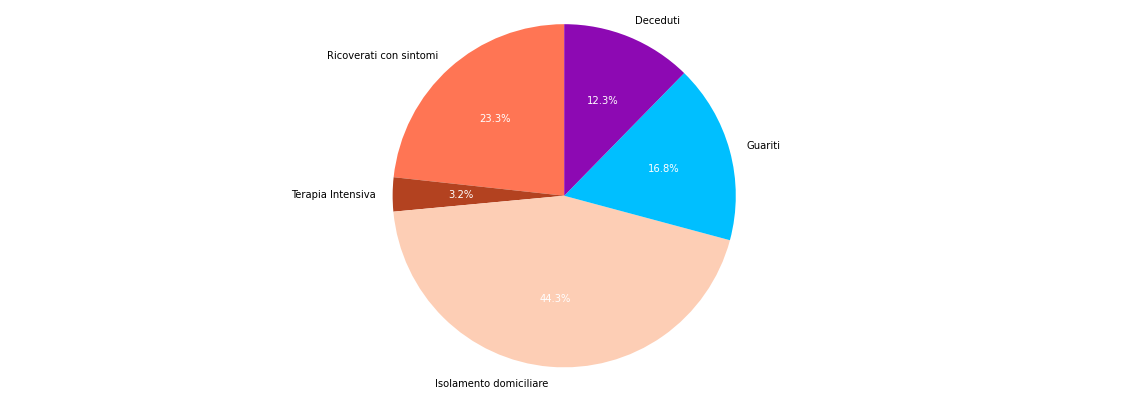

In [145]:
# Data to plot
last_info = national_trend[-1:]
v1 = int(last_info['ricoverati_con_sintomi'])
v2 = int(last_info['terapia_intensiva'])
v3 = int(last_info['isolamento_domiciliare'])
v4 = int(last_info['dimessi_guariti'])
v5 = int(last_info['deceduti'])
labels = 'Ricoverati con sintomi', 'Terapia Intensiva', 'Isolamento domiciliare', 'Guariti', 'Deceduti'
sizes = [v1, v2, v3, v4, v5]
fig1, ax1 = plt.subplots()
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
_, _, autotexts = ax1.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%',  startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    
ax1.axis('equal')

plt.show()


In [146]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = national_trend['data']
percents_in_period['ricoverati_con_sintomi'] = (national_trend['ricoverati_con_sintomi'] / national_trend['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (national_trend['terapia_intensiva'] / national_trend['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (national_trend['isolamento_domiciliare'] / national_trend['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (national_trend['dimessi_guariti'] / national_trend['totale_casi'])*100
percents_in_period['deceduti'] = (national_trend['deceduti'] / national_trend['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

Lo spaccato giorno per giorno percentuale. Da qui si evidenzia come si evolve l'andamento percencentuale dell'epidemia. In basso (in verde) il grafico del Growth Rate di ogni giorno rispetto al giorno precedente. Per capire come si evolvono le percentuali in base all'aumento o la diminuzione dei nuovi casi.

In [147]:
percents_in_period.tail(15).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

,RICOVERATI,TER. INTENSIVA,ISOLAMENTO DOMICILIARE,GUARITI,DECEDUTI
,,,,,
21-Mar-20,33.05,5.33,41.28,11.33,9.01
22-Mar-20,33.56,5.09,40.22,11.88,9.26
23-Mar-20,32.37,5.01,41.49,11.63,9.51
24-Mar-20,31.71,4.91,41.48,12.04,9.86
25-Mar-20,31.07,4.69,41.57,12.59,10.09
26-Mar-20,30.73,4.48,41.78,12.86,10.14
27-Mar-20,30.09,4.31,42.37,12.66,10.56
28-Mar-20,28.85,4.17,42.75,13.39,10.84
29-Mar-20,28.03,4.00,43.60,13.34,11.03


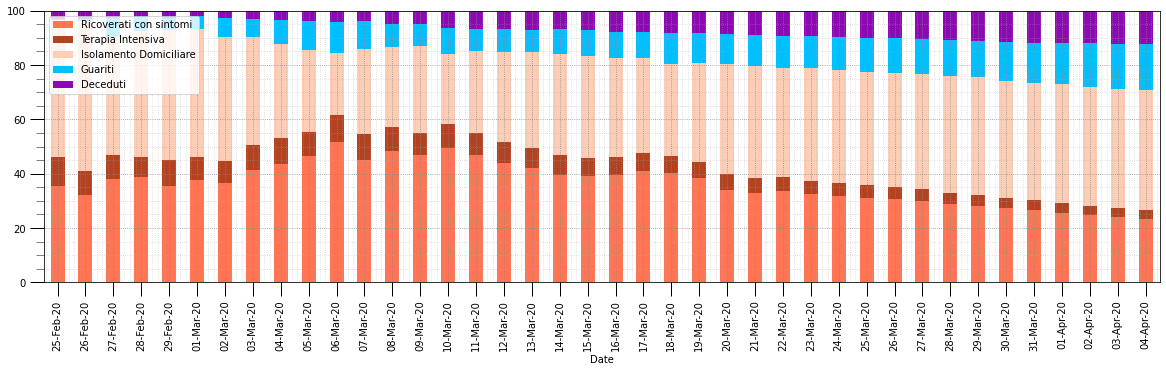

In [148]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 5]

plot = ['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
labels = ['Ricoverati con sintomi','Terapia Intensiva','Isolamento Domiciliare','Guariti','Deceduti']
ax = percents_in_period.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=labels, stacked=True)
ax.set_ylim(0,100)

beautify_graph(ax)


## DATI REGIONALI

> IN ARRIVO